# Data Science Methodology for Breast Cancer Diagnosis (DSM-BCD)

**Problema.** Colombia presenta limitaciones con respecto al acceso de la detección y el diagnóstico temprano del cáncer, provocado en la mayoría de los casos por factores como el estrato socio-económico, la cobertura del seguro de salud, el origen y la accesibilidad. En promedio, el tiempo de espera de un paciente es de 90 días desde la aparición de los síntomas hasta el diagnóstico de dicho cáncer. La primera acción para reducir la tasa de mortalidad por cáncer de mama debe estar enfocada en la agilidad del diagnóstico y el acceso oportuno a la atención.  Así, el objetivo de esta investigación es aplicar las etapas de la metodología KDD\footnote{Knowledge Discovery in Databases} al conjunto de datos de morbilidad por cáncer entre los años 2019 y 2020 en el municipio de Pereira-Risaralda. Esto con la finalidad de pronosticar y caracterizar el tipo de población mas susceptible de padecer esta enfermedad según su edad, genero, zona y régimen de salud.

**Conjunto de datos.** Un total de 817 muestras de tumores de mama se perfilaron con cinco plataformas diferentes como se ha descrito previamente (Cancer Genome Atlas Research Network, 2014) y también se perfilaron 633 casos mediante matriz de proteínas en fase inversa (RPPA)


# Análisis exploratorio de datos

In [122]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import pdfkit
from dataprep.eda import plot, plot_correlation, plot_missing,create_report ,configs
from dataprep.clean import clean_headers
from dataprep.clean import clean_duplication
from dataprep.clean import clean_date
from dataprep.clean import clean_text
import re
import numpy as np

In [123]:
with open('brca_tcga_pub2015_clinical_data.csv') as f:
    breast_cancer=pd.read_csv(f, delimiter=';')

In [124]:
'''bc = breast_cancer.copy()
bc.shape'''

'bc = breast_cancer.copy()\nbc.shape'

In [125]:
"""missing=plot_missing(bc,config={'height': 1200, 'width': 1200})
missing.show_browser()"""

"missing=plot_missing(bc,config={'height': 1200, 'width': 1200})\nmissing.show_browser()"

## 1. Análisis Descriptivo

In [126]:
#report = create_report(breast_cancer, title='Breast Invasive Carcinoma (TCGA, Cell 2015)' , config={'bar.sort_descending': True, 'bar.yscale': 'linear', 'height': 100, 'width': 400, 'bar.color': '#FF8C00', 'hist.color': '#FF8C00'})

In [127]:
#report.show_browser()

In [128]:
#report.save()

In [129]:
#f=plot(bc,config={'bar.sort_descending': True, 'bar.yscale': 'linear', 'height': 100, 'width': 400, 'bar.color': '#FF8C00','bar.enable':True, 'hist.color': '#FF8C00'})
#f.show_browser()


## 2. Transformación de  variables

### 2.1 Re-nombrar Columnas

In [130]:
breast_clean=clean_headers(breast_cancer)

Column Headers Cleaning Report:
	110 values cleaned (100.0%)


In [131]:
breast_clean.columns=breast_clean.columns.str.replace('american_joint_committee_on_cancer_','')

In [132]:
breast_clean.columns=breast_clean.columns.str.replace('international_classification_of_diseases_for_oncology_third_edition_icd_o_3_','')

In [133]:
breast_clean.rename(
columns={
'neoplasm_disease_lymph_node_stage_code':'neoplasm_lymph_code',
'neoplasm_lymph_node_stage_code':'neoplasm_stage',
'brachytherapy_first_reference_point_administered_total_dose':'brachytherapy',
'birth_from_initial_pathologic_diagnosis_date':'birth_initial_diagnosis',
'death_from_initial_pathologic_diagnosis_date':'death_initial_diagnosis',
'last_alive_less_initial_pathologic_diagnosis_date_calculated_day_value':'last_alive_date',
'neoadjuvant_therapy_type_administered_prior_to_resection_text':'neoadjuvant_therapy',
'prior_cancer_diagnosis_occurence':'prior_diagnosis_occurence',
'informed_consent_verified':'consent_verified',
'primary_lymph_node_presentation_assessment_ind_3':'lymph_presentation',
'positive_finding_lymph_node_hematoxylin_and_eosin_staining_microscopy_count':'positive_lymph_hematoxylin',
'positive_finding_lymph_node_keratin_immunohistochemistry_staining_method_count':'positive_lymph_keratin',
'lymph_node_s_examined_number':'lymph_examined_number',
'first_pathologic_diagnosis_biospecimen_acquisition_method_type':'biospecimen_method',
'first_pathologic_diagnosis_biospecimen_acquisition_other_method_type':'biospecimen_other_method',
'new_neoplasm_event_post_initial_therapy_indicator':'new_neoplasm_event',
'adjuvant_postoperative_pharmaceutical_therapy_administered_indicator':'pharmaceutical_therapy',
'tissue_prospective_collection_indicator':'tissue_prospective_indicator',
'did_patient_start_adjuvant_postoperative_radiotherapy':'postoperative_radiotherapy',
'tissue_retrospective_collection_indicator':'tissue_retrospective_indicator',
'number_of_samples_per_patient':'number_samples',
'surgery_for_positive_margins':'surgery_positive',
'surgery_for_positive_margins_other':'surgery_positive_other',
'surgery_for_positive_margins_other':'surgery_positive_other',
'neoplasm_histologic_type_name':'neoplasm_histologic_type',
'tumor_other_histologic_subtype':'tumor_other_subtype',
'year_cancer_initial_diagnosis':'year_initial_diagnosis',
'first_surgical_procedure_other':'surgical_other'
}, inplace=True)

In [134]:
breast_clean.columns=breast_clean.columns.str.replace('_to_','_')

In [135]:
breast_clean.columns=breast_clean.columns.str.replace('_and_','_')

In [136]:
breast_clean.columns=breast_clean.columns.str.replace('_by_','_')

In [137]:
#breast_clean.to_csv('Breast_Normal_Data.csv',index=False)

### 2.2 Estandarizar variables de Texto

In [138]:
custom_pipeline = [{"operator": "lowercase"}]
for i in breast_clean.columns:
    breast_clean=clean_text(breast_clean,i,pipeline=custom_pipeline)

In [139]:
breast_clean = breast_clean.replace("<NA>", np.NaN)

In [140]:
breast_clean = breast_clean.replace("nan",np.NaN)

In [141]:
breast_clean = breast_clean.replace("nan",'')

In [142]:
breast_clean.brachytherapy=breast_clean.brachytherapy.replace(
    ['no value given',
    '% ihc',
    '-',
    ' '],[np.NaN,
    'ihc',
    '',
    ''],regex=True)

In [143]:
breast_clean.publication_version_type=breast_clean.publication_version_type.replace(
    ['th|rd'],[''],regex=True)

In [144]:
breast_clean.cent_17_copy_number=breast_clean.cent_17_copy_number.replace(
    ['polisomy',],[np.NaN,],regex=True)

In [145]:
breast_clean.er_positivity_scale_used=breast_clean.er_positivity_scale_used.replace(
    ['point scale',],
    [''],regex=True)

In [146]:
breast_clean.disease_free_status=breast_clean.disease_free_status.replace(
    ['0:diseasefree',
    '1:recurred/progressed'],
    ['diseasefree',
    'progressed'],regex=True)

In [147]:
breast_clean.days_last_followup = breast_clean.days_last_followup.replace(
    ['-'],[''],regex=True)

In [148]:
breast_clean.her_2_copy_number=breast_clean.her_2_copy_number.replace(
    ['<',
    '>',
    'not amplified'
    ],
    ['',
    '',
    0],regex=True)

In [149]:
breast_clean.er_positivity_scale_other=breast_clean.er_positivity_scale_other.replace(
    ['protein',
    'allred score 0',
    '=',
    'scrore',
    'h-score',
    'intensity',
    'strong using weak, moderate and strong',
    'moderate using the scale of weak, moderate, strong',
    'moderate using scale of weak, moderate, strong',
    ' \(per outside facility\)',
    '  ',
    ' '
    ],
    ['',
    'allred score',
    '',
    'score',
    'hscore',
    '',
    'strong',
    'moderate',
    'moderate',
    '',
    '',
    ''
    ],regex=True)

In [150]:
breast_clean.surgical_other=breast_clean.surgical_other.replace(
    ['biospy',
    "patey's",
    'lymoh'],
    ['biopsy',
    'pateys',
    'lymph'],regex=True)

In [151]:
breast_clean.neoplasm_histologic_type=breast_clean.neoplasm_histologic_type.replace(
    ["(please specify)",
    "other, specify",
    '\(','\)'],
    ['',
    'other',
    '',''],regex=True)

In [152]:
breast_clean.tumor_other_subtype=breast_clean.tumor_other_subtype.replace(
    ['ductal and lobular features',
    'infiltrating ductal & lobular',
    'lobular carcinoma with ductal features',
    'lobular/ductal'],
    ['ductal/lobular',
    'infiltrating ductal and lobular carcinoma',
    'ductal/lobular',
    'ductal/lobular'],regex=True)

In [153]:
breast_clean.icd_10_classification=breast_clean.icd_10_classification.replace(
    ['c50.919'],['c50.9'],regex=True)

In [154]:
breast_clean.menopause_status=breast_clean.menopause_status.replace(
    ['post \(prior bilateral ovariectomy or >12 mo since lmp with no prior hysterectomy\)',
    'pre \(<6 months since lmp and no prior bilateral ovariectomy and not on estrogen replacement\)',
    'indeterminate \(neither pre or postmenopausal\)',
    'peri \(6-12 months since last menstrual period\)'
    ],
    ['post',
    'pre',
    'indeterminate',
    'peri'],regex=True)

In [155]:
breast_clean.metastatic_site=breast_clean.metastatic_site.replace(
    ['lung\|bone\|liver\|other, specify',
     'other, specify',
    'bone\|liver',
    ],
    ['other',
    'other',
    'bone-liver',],regex=True)

In [156]:
breast_clean.biospecimen_method=breast_clean.biospecimen_method.replace(
    ['other method, specify:',
    'cytology \(e.g. peritoneal or pleural fluid\)'
    ],
    ['other',
    'cytology'
    ],regex=True)

In [157]:
breast_clean.biospecimen_other_method=breast_clean.biospecimen_other_method.replace(
    ['biopsy, nos',
    "patey's",
    'surgery'
    ],
    ['biopsy',
    "pateys",
    'suregery'
    ],regex=True)

In [158]:
breast_clean.overall_survival_status=breast_clean.overall_survival_status.replace(
    ['0:living',
    '1:deceased'],
    ['0',
    '1'],regex=True)

In [159]:
breast_clean.pr_positivity_define_method=breast_clean.pr_positivity_define_method.replace(
    ['no value given',
    '%ihc',
    'per outside facility report',
    '-',
    ' ',
    ],[np.NaN,
    'ihc',
    '',
    '',
    ''],regex=True)

In [160]:
breast_clean.pr_positivity_scale_other=breast_clean.pr_positivity_scale_other.replace(
    ['protein',
    'allred score 0',
    '=',
    'scrore',
    'h-score',
    'intensity',
    'strong using weak, moderate and strong',
    'moderate using the scale of weak, moderate, strong',
    'moderate using scale of weak, moderate, strong',
    ' \(per outside facility\)',
    'per outside facility report',
    'strong, using scale of weak, moderate and strong',
    'allread',
    '  ',
    ' ',
    ],
    ['',
    'allred score',
    '',
    'score',
    'hscore',
    '',
    'strong',
    'moderate',
    'moderate',
    '',
    '',
    'Strong',
    'allred',
    '',
    '',
    ],regex=True)

In [161]:
breast_clean.staging_system=breast_clean.staging_system.replace(
    ['other \(specify\)'
    ],
    ['other'
    ],regex=True)

In [162]:
breast_clean.staging_system_1=breast_clean.staging_system_1.replace(
    ['sln and non-sln bx|'+
     'sln and non-sln biopsy|'+
     'sentinel ln and one non sentinel ln|'
     'sentinel \+ non sentinel|'
     'sn\+1 non sentinel node|'
     'sentinel lymph node biopsy and non-sentinel lymph node biopsy'
    ],
    ['sentinel lymph node and non-sentinel lymph node biopsy'
    ],regex=True)

In [163]:
breast_clean.pr_positivity_ihc_intensity_score=breast_clean.pr_positivity_ihc_intensity_score.replace(
    ['\+'],[''],regex=True)

In [164]:
breast_clean.pr_positivity_scale_used=breast_clean.pr_positivity_scale_used.replace(
    ['point scale',],
    [''],regex=True)

In [165]:
'''breast_clean=breast_cancer.drop(
    ['i_study_id',
    'patient_id',
    'sample_id',
    'disease_code',
    'her_2_and_cent_17_scale_other',
    'her_2_and_cent_17_scale_other',
    'her_2_positivity_scale_other',
    'tumor_other_histologic_subtype',
    'metastatic_site',
    'metastatic_site_other',
    'nte_cent_17_her_2_ratio',
    'nte_er_ihc_intensity_score',
    'nte_er_status',
    'nte_er_status_ihc_positive',
    'nte_her_2_fish_status',
    'nte_her_2_positivity_ihc_score',
    'nte_her_2_status',
    'nte_her_2_status_ihc_positive',
    'nte_pr_ihc_intensity_score',
    'nte_pr_status_by_ihc',
    'nte_pr_status_ihc_positive',
    'project_code',
    'staging_system_1',
    'surgery_for_positive_margins_other',
    'other_patient_id',
    'other_sample_id'
    ], axis=1)'''


"breast_clean=breast_cancer.drop(\n    ['i_study_id',\n    'patient_id',\n    'sample_id',\n    'disease_code',\n    'her_2_and_cent_17_scale_other',\n    'her_2_and_cent_17_scale_other',\n    'her_2_positivity_scale_other',\n    'tumor_other_histologic_subtype',\n    'metastatic_site',\n    'metastatic_site_other',\n    'nte_cent_17_her_2_ratio',\n    'nte_er_ihc_intensity_score',\n    'nte_er_status',\n    'nte_er_status_ihc_positive',\n    'nte_her_2_fish_status',\n    'nte_her_2_positivity_ihc_score',\n    'nte_her_2_status',\n    'nte_her_2_status_ihc_positive',\n    'nte_pr_ihc_intensity_score',\n    'nte_pr_status_by_ihc',\n    'nte_pr_status_ihc_positive',\n    'project_code',\n    'staging_system_1',\n    'surgery_for_positive_margins_other',\n    'other_patient_id',\n    'other_sample_id'\n    ], axis=1)"

### 2.3 Ajustar tipo de variables

In [166]:
convert_data = ['publication_version_type','cent_17_copy_number','er_positivity_scale_used',
'her_2_copy_number','her_2_ihc_score','ihc_score','positive_lymph_keratin',
'pr_positivity_ihc_intensity_score','pr_positivity_scale_used',
'number_samples','tmb_nonsynonymous','her_2_cent_17_ratio','lymph_examined_number','mutation_count',
'overall_survival_months','disease_free_months','days_last_followup']

for i in convert_data:
    breast_clean[i] = pd.to_numeric(breast_clean[i].fillna(0))
    print(i,':',breast_clean[i].dtype)

publication_version_type : int64
cent_17_copy_number : float64
er_positivity_scale_used : int64
her_2_copy_number : float64
her_2_ihc_score : float64
ihc_score : float64
positive_lymph_keratin : float64
pr_positivity_ihc_intensity_score : int64
pr_positivity_scale_used : int64
number_samples : int64
tmb_nonsynonymous : float64
her_2_cent_17_ratio : float64
lymph_examined_number : float64
mutation_count : float64
overall_survival_months : float64
disease_free_months : float64
days_last_followup : float64


## 3. Procesamiento de datos ausentes

### 3.1 Detección de datos ausentes

In [167]:
missing=plot_missing(breast_clean,config={'height': 400, 'width': 400})
missing.show_browser()

  0%|          | 0/946 [00:00<?, ?it/s]

In [168]:
breast_clean.days_last_followup

0       259.0
1       437.0
2      1321.0
3      1463.0
4      1437.0
        ...  
813      85.0
814       0.0
815     714.0
816    1658.0
817    1021.0
Name: days_last_followup, Length: 818, dtype: float64

### 3.2 Imputación de datos ausentes


In [169]:
from sklearn.impute import KNNImputer

#Colocar lo del 5%
# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="distance")
#imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

imput_data=['diagnosis_age',
            'cent_17_copy_number',
            'birth_initial_diagnosis',
            'days_sample_collection',
            'her_2_cent_17_ratio',
            'disease_free_months',
            'days_last_followup',
            'fraction_genome_altered',
            'year_initial_diagnosis',
            'positive_lymph_hematoxylin',
            'lymph_examined_number',
            'mutation_count',
            'overall_survival_months',
            'tmb_nonsynonymous'
]

for i in imput_data :
    breast_clean[i]=breast_clean[i].replace([0.0,0,'0','0.0'],[np.nan,np.nan,np.nan,np.nan])

    # Ajustamos el modelo e imputamos los missing values
    imputer.fit(breast_clean[[i]])
    breast_clean[i] = imputer.transform(breast_clean[[i]]).ravel()
    breast_clean[i] = round(breast_clean[i],1)

In [170]:
from sklearn.impute import SimpleImputer

mode_data=['neoplasm_disease_stage_code',
           'brachytherapy',
           'publication_version_type',
           'er_positivity_scale_used',
           'cancer_type_detailed',
           'disease_free_status',
           'er_positivity_scale_other',
           'er_status_ihc_percent_positive',
           'ethnicity_category',
           'surgical_other',
           'er_status_ihc',
           'her_2_fish_status',
           'her_2_ihc_score',
           'her_2_ihc_percent_positive',
           'neoplasm_histologic_type',
           'neoadjuvant_therapy',
           'prior_diagnosis_occurence','ihc_her_2','ihc_score',
           'lymph_presentation',
           'menopause_status',
           'metastatic_tumor_indicator',
           'biospecimen_method',
           'micromet_detection_ihc',
           'oct_embedded',
           'disease_surgical_margin_status',
           'primary_tumor_site',
           'tissue_prospective_indicator',
           'pr_positivity_define_method',
           'pr_positivity_scale_other',
           'positive_lymph_keratin',
           'pr_status_ihc',
           'pr_status_ihc_percent_positive',
           'pr_positivity_ihc_intensity_score',
           'pr_positivity_scale_used',
           'race_category','tissue_retrospective_indicator',
           'staging_system',
           'surgical_procedure_first',
           'tissue_source_site','person_neoplasm_status'
           ]

for i in mode_data :
    breast_clean[i]=breast_clean[i].replace([0.0,0,'0','0.0'],[np.nan,np.nan,np.nan,np.nan])
    breast_clean[i] = breast_clean[i].fillna(breast_clean[i].mode()[0])
    imputer = SimpleImputer(strategy='most_frequent', 
                            missing_values=np.nan)
    imputer = imputer.fit(breast_clean[[i]])
    breast_clean[[i]] = imputer.transform(breast_clean[[i]])

### 3.3 Eliminar datos innecesarios

In [171]:

breast_clean=breast_clean.drop(
[
'study_id',
'patient_id',
'sample_id',
'cancer_type',
'death_initial_diagnosis',
'last_alive_date',
'disease_code',
'her_2_cent_17_cells_count',
'her_2_cent_17_scale_other',
'her_2_copy_number',
'her_2_fish_method',
'her_2_positivity_method_text',
'her_2_positivity_scale_other',
'tumor_other_subtype',
'consent_verified',
'is_ffpe',
'margin_status_reexcision',
'metastatic_site',
'metastatic_site_other',
'biospecimen_other_method',
'new_neoplasm_event',
'nte_cent_17_her_2_ratio',
'nte_er_ihc_intensity_score',
'nte_er_status',
'nte_er_status_ihc_positive',
'nte_her_2_fish_status',
'nte_her_2_positivity_ihc_score',
'nte_her_2_status',
'nte_her_2_status_ihc_positive',
'nte_pr_ihc_intensity_score',
'nte_pr_status_ihc',
'nte_pr_status_ihc_positive',
'other_patient_id',
'other_sample_id',
'pathology_report_file_name',
'pharmaceutical_therapy',
'project_code',
'postoperative_radiotherapy',
'somatic_status',
'staging_system_1',
'surgery_positive',
'surgery_positive_other',
'tumor_disease_anatomic_site'
], axis=1
)

In [172]:
missing=plot_missing(breast_clean,config={'height': 400, 'width': 400})
missing.show_browser()

  0%|          | 0/602 [00:00<?, ?it/s]

## 4. Análisis de correlación de variables 

In [173]:
correlation = plot_correlation(breast_clean)
correlation.show_browser()

In [174]:
### report = create_report(breast_clean, title='Breast Invasive Clean Report')
### report.show_browser()

In [175]:
breast_clean.to_csv('Breast_Clean_Data.csv',index=False)
#breast_clean.to_csv('breast_clean_classification.csv',index=False)
#breast_clean.shape

In [176]:
#breast_clean.dtypes.to_csv('dtype_breastclean.csv')

In [177]:
with open('Breast_Clean_Data.csv') as f:
    tips=pd.read_csv(f, delimiter=',')

In [178]:
import seaborn as sns
import pandas as pd

'''sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook")
sns.set_palette("husl")
numerical=sns.histplot(breast_clean['diagnosis_age'],bins=50,kde = True)
numerical.set(title='diagnosis_age')
numerical.tick_params(axis='x')
plot=numerical.get_figure()
#plot.savefig("diagnosis_age.pdf")'''

'sns.set_style("darkgrid", {"axes.facecolor": ".9"})\nsns.set_context("notebook")\nsns.set_palette("husl")\nnumerical=sns.histplot(breast_clean[\'diagnosis_age\'],bins=50,kde = True)\nnumerical.set(title=\'diagnosis_age\')\nnumerical.tick_params(axis=\'x\')\nplot=numerical.get_figure()\n#plot.savefig("diagnosis_age.pdf")'

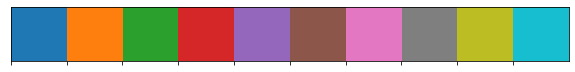

In [179]:
diverging_colors = sns.color_palette()
sns.palplot(diverging_colors)

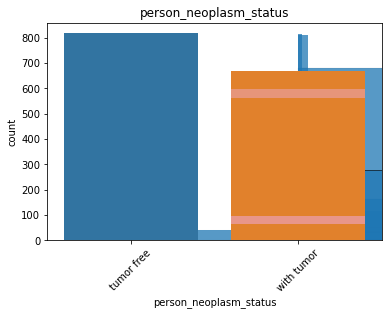

In [185]:
import seaborn as sns
import pandas as pd

PATH_CATEGORICAS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_CATEGORICAS\\'
PATH_NUMERICAS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_NUMERICAS\\'

#sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#sns.set_context("notebook")
#sns.set_palette("husl")


for i in breast_clean.columns:
    # Get the counts of each category and sort them in descending order
    if breast_clean[i].dtypes == 'float64' or breast_clean[i].dtypes == 'int64':
        #counts = breast_clean[i].value_counts().nlargest(10)
        
        numerical=sns.histplot(breast_clean[i],bins=50,kde = False)
        numerical.tick_params(axis='x', rotation=75)
        numerical.set(title=i)
        numerical.tick_params(axis='x')
        plot_num=numerical.get_figure()
        plot_num.savefig(PATH_NUMERICAS+i+".pdf")


for i in breast_clean.columns:  
       if breast_clean[i].dtypes == 'object' : 
        #counts = tips[i].value_counts().sort_values(ascending=False)
        #top_counts = counts[:10]
        categorical=sns.countplot(data=tips, x=i)
        categorical.tick_params(axis='x', rotation=45)
        categorical.set(title=i)
        plot_cat = categorical.get_figure()
        plot_cat.savefig(PATH_CATEGORICAS+i+".pdf")

In [181]:
#import seaborn as sns
#import pandas as pd

#sns.pairplot(breast_clean)